In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import cv2
from skimage.metrics import structural_similarity as ssim

## Generation images example

In [502]:
import sys
sys.path.append('../snakes/')

In [503]:
import snakes2_wrapper

In [504]:
def run_snake_image_generator(n_images, image_size, difficulty):
    # Create a mock of command-line arguments
    sys.argv = ['snakes2_wrapper.py', str(n_images), str(image_size), difficulty]
    
    snakes2_wrapper.main()

In [515]:
n_images = 10
image_size = 256
difficulty = 'hard'
run_snake_image_generator(n_images=n_images, image_size=image_size, difficulty=difficulty)

Metadata file already exists.
Generated 10 images
Elapsed time: 0.00 seconds


Plot images

In [512]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

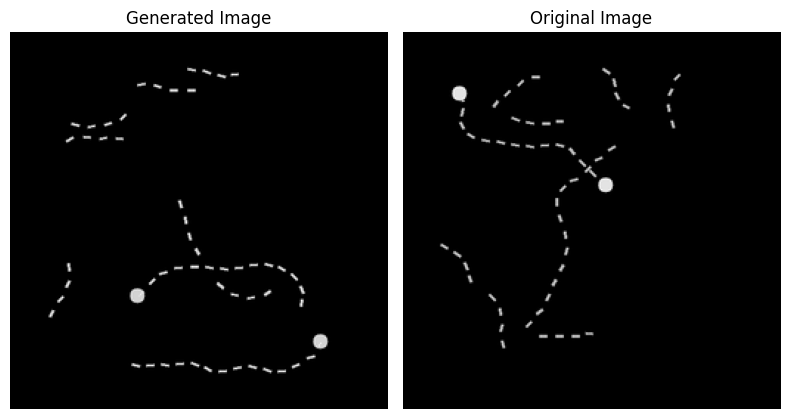

In [522]:
iter = 6
# curv_baseline curv_contour_length_9 curv_contour_length_14
gen_path = f'../data/{difficulty}_{n_images}_{image_size}/curv_contour_length_14/imgs/0/'
orig_path = f'../data/lra_release/lra_release/pathfinder256/curv_contour_length_14/imgs/0/'

gen_img = mpimg.imread(gen_path + f'sample_{iter}.png')
orig_img = mpimg.imread(orig_path + f'sample_{iter}.png')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))

ax1.imshow(gen_img, cmap='gray')
ax1.axis('off')
ax1.set_title('Generated Image')

ax2.imshow(orig_img, cmap='gray')
ax2.axis('off')
ax2.set_title('Original Image')

plt.tight_layout()
plt.show()

## Compare and delete similar images among generated by script and official

In [517]:
def load_images_from_folder(folder):
    """
    Loads all images from a specified folder and returns them in a dictionary.

    Args:
        folder (str): The path to the folder containing images.

    Returns:
        dict: A dictionary where keys are filenames and values are the corresponding grayscale images.
    """
    images = {}
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images[filename] = img
    return images

def compare_and_delete_images(folder1, folder2, similarity_threshold=0.9):
    """
    Compares images from two folders and deletes images from the first folder if they are similar to any image in the second folder.

    Args:
        folder1 (str): The path to the first folder containing images to be compared and potentially deleted.
        folder2 (str): The path to the second folder containing images to compare against.
        similarity_threshold (float): The threshold for similarity (default is 0.9). Images with a similarity score above this threshold are considered similar.

    Returns:
        None
    """
    images1 = load_images_from_folder(folder1)
    images2 = load_images_from_folder(folder2)

    for img1_name, img1 in images1.items():
        for img2_name, img2 in images2.items():
            if img1.shape == img2.shape:
                score, _ = ssim(img1, img2, full=True)
                if score >= similarity_threshold:
                    os.remove(os.path.join(folder1, img1_name))
                    print(f"Deleted {img1_name} from {folder1} (similar to {img2_name} in {folder2}) with score {score}")

Do not change the order of folders because some images can be deleted from `folder1`

In [523]:
# Folder of generated images
folder1 = gen_path

# Folder of official images
folder2 = orig_path

Threshold of similarity of generated and official images in datasets

In [524]:
similarity_threshold = 0.9

Compare and delete similar images from `folder1`

In [525]:
compare_and_delete_images(folder1, folder2, similarity_threshold)